# Preprocessing of the data

In [1]:
import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as fn
from pyspark.sql.window import Window
from pyspark.sql.types import StructType, StructField, StringType, ArrayType, IntegerType, DateType, FloatType
import datetime
import random
import sys
# import os
import pyarrow
import pandas as pd

This two cells should be used for connecting with HDFS. But honestly I have no idea.

In [2]:
# # Set environment variables (if not already set)
# os.environ['SPARK_HOME'] = 'C:/spark'
# os.environ['HADOOP_HOME'] = 'C:/spark'  # This is optional, needed only if Hadoop is required

# # Ensure the path includes SPARK_HOME/bin
# os.environ['PATH'] += os.pathsep + os.path.join(os.environ['SPARK_HOME'], 'bin')

In [3]:
# os.environ['PYSPARK_PYTHON'] = sys.executable
# os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
# # os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "gcs_config.json"
# os.environ["JAVA_HOME"] = "C:/Program Files/Java/jdk-11.0.7"
# os.environ["SPARK_HOME"] = "C:/spark"
# # findspark.init()

# spark = SparkSession.builder \
#     .config("spark.pyspark.python", "/path/to/python3") \
#     .config("spark.pyspark.driver.python", "/path/to/python3") \
#     .getOrCreate()

The first thing we have to do is create a Spark session that we will use for the preprocessing of the data.

In [4]:
# Create a Spark session to work with Dataframes
spark = SparkSession.builder.appName("BDM").getOrCreate()
# Create a Spark context to work with RDDs
sc = pyspark.SparkContext.getOrCreate()

24/05/28 22:26:35 WARN Utils: Your hostname, LAPTOP-4EV3P84J resolves to a loopback address: 127.0.1.1; using 172.31.136.208 instead (on interface eth0)
24/05/28 22:26:35 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/28 22:26:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## Loading the data

We have data that comes from different sources, therefore we have to load it into Spark. However, all of them will have their own structure, so we have to create the respective dataframes.

In [206]:
# Read the Parquet file into a DataFrame
programs_Nils = spark.read.parquet("parquet/programs.parquet")
programs_Enxhi = spark.read.parquet("parquet/masters_ERASMUS.parquet")
scholarships_Enxhi = spark.read.parquet("parquet/scholarships_ERASMUS.parquet")
scholarships_Pepe = spark.read.parquet("parquet/scholarships&unis.parquet")
scholarships_Nils = spark.read.parquet("parquet/scholarships_ministery.parquet")
comments_Enxhi = spark.read.parquet("parquet/comments_ERASMUS.parquet")

In [207]:
programs_Nils = programs_Nils.select(programs_Nils.degree.alias("Title"),\
                                     programs_Nils.university.alias("University"),\
                                     programs_Nils.url.alias("URL"),\
                                     programs_Nils.description.alias("Description"),\
                                     programs_Nils.eligible_score.alias("EligibleScore"),\
                                     programs_Nils.english_lvl.alias("EnglishLvl"),\
                                     programs_Nils.location.alias("Location"),\
                                     programs_Nils.spanish_lvl.alias("SpanishLvl"),\
                                     programs_Nils.type.alias("Type"),\
                                     programs_Nils.duration.alias("Duration"),\
                                     programs_Nils.ap_date.alias("ApplicationDate"),\
                                     programs_Nils.st_date.alias("StartingDate"),\
                                     programs_Nils.prerequisite_bachelor.alias("BachelorNeeded"))

programs_Enxhi = programs_Enxhi.select(programs_Enxhi.Title,\
                                       fn.col("Program URL").alias("URL"),\
                                       programs_Enxhi.Location,\
                                       programs_Enxhi.Spanish_Universities.alias("University"),\
                                       fn.col("Detailed Description").alias("Description"),\
                                       programs_Enxhi.Duration_Years.alias("Duration"),\
                                       fn.col("Application Date").alias("ApplicationDate"),\
                                       fn.col("Start Date").alias("StartingDate"),\
                                       programs_Enxhi.Type,\
                                       programs_Enxhi.eligible_score.alias("EligibleScore"),\
                                       programs_Enxhi.eligible_lvl.alias("EnglishLvl"),\
                                       programs_Enxhi.prerequisite_bachelor.alias("BachelorNeeded"),\
                                       programs_Enxhi.spanish_lvl.alias("SpanishLvl"))

scholarships_Enxhi = scholarships_Enxhi.select(scholarships_Enxhi.AwardName,\
                                               scholarships_Enxhi.Spanish_Universities.alias("University"),\
                                               scholarships_Enxhi.Description,\
                                               scholarships_Enxhi.Deadline,\
                                               scholarships_Enxhi.Type,\
                                               scholarships_Enxhi.eligible_score.alias("EligibleScore"),\
                                               scholarships_Enxhi.eligible_lvl.alias("EnglishLvl"),\
                                               scholarships_Enxhi.prerequisite_bachelor.alias("BachelorNeeded"),\
                                               scholarships_Enxhi.spanish_lvl.alias("SpanishLvl"),\
                                               scholarships_Enxhi.Duration_Years.alias("Duration"),\
                                               scholarships_Enxhi.Nationality,\
                                               scholarships_Enxhi.Amount,\
                                               scholarships_Enxhi.NumAwards,\
                                               scholarships_Enxhi.MinAge,\
                                               scholarships_Enxhi.MaxAge,\
                                               scholarships_Enxhi.AcademicPerformance)

scholarships_Pepe = scholarships_Pepe.select(scholarships_Pepe.AwardName,\
                                             scholarships_Pepe.Description,\
                                             scholarships_Pepe.Deadline,\
                                             scholarships_Pepe.Type,\
                                             scholarships_Pepe.EligibleScore,\
                                             scholarships_Pepe.EnglishLvl,\
                                             scholarships_Pepe.BachelorNeeded,\
                                             scholarships_Pepe.SpanishLvl,\
                                             scholarships_Pepe.Nationality,\
                                             scholarships_Pepe.Amount,\
                                             scholarships_Pepe.NumAwards,\
                                             scholarships_Pepe.MinAge,\
                                             scholarships_Pepe.MaxAge,\
                                             scholarships_Pepe.AcademicPerformance,\
                                             scholarships_Pepe.UID,\
                                             scholarships_Pepe.PID)

scholarships_Nils = scholarships_Nils.select(scholarships_Nils.AwardName,\
                                             scholarships_Nils.Description,\
                                             scholarships_Nils.Deadline,\
                                             scholarships_Nils.Type,\
                                             scholarships_Nils.EligibleScore,\
                                             scholarships_Nils.EnglishLvl,\
                                             scholarships_Nils.BachelorNeeded,\
                                             scholarships_Nils.SpanishLvl,\
                                             scholarships_Nils.Nationality,\
                                             scholarships_Nils.Amount,\
                                             scholarships_Nils.NumAwards,\
                                             scholarships_Nils.MinAge,\
                                             scholarships_Nils.MaxAge,\
                                             scholarships_Nils.AcademicPerformance)

comments_Enxhi = comments_Enxhi.select(comments_Enxhi.Title,\
                                       comments_Enxhi.Comment_1,\
                                       comments_Enxhi.Comment_2,\
                                       comments_Enxhi.Comment_3,\
                                       comments_Enxhi.Comment_4,\
                                       comments_Enxhi.Comment_5,\
                                       comments_Enxhi.Comment_6,\
                                       comments_Enxhi.Comment_7,\
                                       comments_Enxhi.Comment_8)

## Transform the data

### PROGRAMS

For the progrms, we have 2 different sources:

In [208]:
# We are only interested in some of the columns for now.
programs_Nils = programs_Nils.select("Title","Type","University","Description","URL","Duration", "Location","ApplicationDate",\
            "StartingDate","EligibleScore","EnglishLvl","SpanishLvl","BachelorNeeded")
programs_Enxhi = programs_Enxhi.select("Title","Type","University","Description","URL","Duration", "Location","ApplicationDate",\
            "StartingDate","EligibleScore","EnglishLvl","SpanishLvl","BachelorNeeded")

Hence, the programs we will be considering will be the union of these 2 dataframes:

In [209]:
# We can now combine both datasets
programs_df = programs_Nils.union(programs_Enxhi)

# And create an ID for every row
window_spec = Window.partitionBy(fn.lit(1)).orderBy(fn.monotonically_increasing_id())
programs_df = programs_df.withColumn("ID", fn.row_number().over(window_spec))

The column that contains the Score needed to be accepted in the program is currently a string, for the future we will convert it to an Integer.

In [210]:
# Turn EligibleScore into a Integer
programs_df = programs_df.withColumn("EligibleScore", fn.split(fn.col("EligibleScore"), "/")[0].cast("int"))

The columns with the languages criteria is also a string. Let us define an order between the different language levels in the dataset.

In [211]:
# Define an order for the language levels
# First, we fill the null values with 'None'
programs_df = programs_df.fillna({'SpanishLvl': 'None'})

# Define the order of the language levels
order = {
    "None": 0,
    "A1": 1,
    "A2": 2,
    "B1": 3,
    "B2": 4,
    "C1": 5,
    "C2": 6
}

# Map the column EnglishLvl
programs_df = programs_df.withColumn("orderEnglish", fn.when(fn.col("EnglishLvl") == "None", order["None"])
                             .when(fn.col("EnglishLvl") == "A1", order["A1"])
                             .when(fn.col("EnglishLvl") == "A2", order["A2"])
                             .when(fn.col("EnglishLvl") == "B1", order["B1"])
                             .when(fn.col("EnglishLvl") == "B2", order["B2"])
                             .when(fn.col("EnglishLvl") == "C1", order["C1"])
                             .when(fn.col("EnglishLvl") == "C2", order["C2"]))

# Map the column SpanishLvl
programs_df = programs_df.withColumn("orderSpanish", fn.when(fn.col("SpanishLvl") == "None", order["None"])
                             .when(fn.col("SpanishLvl") == "A1", order["A1"])
                             .when(fn.col("SpanishLvl") == "A2", order["A2"])
                             .when(fn.col("SpanishLvl") == "B1", order["B1"])
                             .when(fn.col("SpanishLvl") == "B2", order["B2"])
                             .when(fn.col("SpanishLvl") == "C1", order["C1"])
                             .when(fn.col("SpanishLvl") == "C2", order["C2"]))

The programs' dataset contains a column with the university to which the program belongs and the location of the country it is in. Since the universities repeat every now and then, we can create a dataframe with the information for each university.

In [212]:
# Create a df for the universities
universities_df = programs_df.select("University","Location").distinct()
# Assign an ID to each of them
window_spec = Window.partitionBy(fn.lit(1)).orderBy(fn.monotonically_increasing_id())
universities_df = universities_df.withColumn("uni_ID", fn.row_number().over(window_spec))

Once created a dataframe for universities with its own ID, we can drop the university from the programs' dataframe and leave just a foreign key to the universities' dataframe.

In [213]:
# Join both datasets
joined_df = programs_df.join(universities_df, programs_df.University == universities_df.University, 'left')
joined_df = joined_df.select("ID","Title","Type","uni_ID","Description","URL","Duration","ApplicationDate",\
            "StartingDate","EligibleScore","EnglishLvl","SpanishLvl","BachelorNeeded")

### SCHOLARSHIPS

The scholarships come from two different sources, the first one (scholarships_Enxhi) will contain the Erasmus Mundus grants and the other one (scholarships_Pepe) contains any other grant.

In [214]:
# We are only interested in some of the columns for now.
scholarships1 = scholarships_Enxhi.select("AwardName","Description","Nationality",\
            "Amount","NumAwards", "Deadline","EligibleScore","EnglishLvl","SpanishLvl",\
            "BachelorNeeded","MinAge","MaxAge","AcademicPerformance","Type")
scholarships2 = scholarships_Pepe.select("AwardName","Description","Nationality",\
            "Amount","NumAwards", "Deadline","EligibleScore","EnglishLvl","SpanishLvl",\
            "BachelorNeeded","MinAge","MaxAge","AcademicPerformance","Type")
scholarships3 = scholarships_Nils.select("AwardName","Description","Nationality",\
            "Amount","NumAwards", "Deadline","EligibleScore","EnglishLvl","SpanishLvl",\
            "BachelorNeeded","MinAge","MaxAge","AcademicPerformance","Type")

Hence, the scholarships from our dataset will be the union of these 2 datasets.

In [215]:
# We can now combine both datasets
scholarships_df = scholarships1.union(scholarships2).union(scholarships3)

# And create an ID for every row
window_spec = Window.partitionBy(fn.lit(1)).orderBy(fn.monotonically_increasing_id())
scholarships_df = scholarships_df.withColumn("ID", fn.row_number().over(window_spec))

As before, let us turn the EligibleScore column into an Integer

In [216]:
# Turn EligibleScore into an Integer
scholarships_df = scholarships_df.withColumn("EligibleScore", fn.split(fn.col("EligibleScore"), "/")[0].cast("int"))

Analogously as previosly, let us define an order among the language levels required.

In [217]:
# Define an order for the language levels
# First, we fill the null values with 'None'
scholarships_df = scholarships_df.fillna({'SpanishLvl': 'None'})
scholarships_df = scholarships_df.fillna({'EnglishLvl': 'None'})

# Define the order of the language levels
order = {
    "None": 0,
    "A1": 1,
    "A2": 2,
    "B1": 3,
    "B2": 4,
    "C1": 5,
    "C2": 6
}

# Map the column EnglishLvl
scholarships_df = scholarships_df.withColumn("orderEnglish", fn.when(fn.col("EnglishLvl") == "None", order["None"])
                             .when(fn.col("EnglishLvl") == "A1", order["A1"])
                             .when(fn.col("EnglishLvl") == "A2", order["A2"])
                             .when(fn.col("EnglishLvl") == "B1", order["B1"])
                             .when(fn.col("EnglishLvl") == "B2", order["B2"])
                             .when(fn.col("EnglishLvl") == "C1", order["C1"])
                             .when(fn.col("EnglishLvl") == "C2", order["C2"]))

# Map the column SpanishLvl
scholarships_df = scholarships_df.withColumn("orderSpanish", fn.when(fn.col("SpanishLvl") == "None", order["None"])
                             .when(fn.col("SpanishLvl") == "A1", order["A1"])
                             .when(fn.col("SpanishLvl") == "A2", order["A2"])
                             .when(fn.col("SpanishLvl") == "B1", order["B1"])
                             .when(fn.col("SpanishLvl") == "B2", order["B2"])
                             .when(fn.col("SpanishLvl") == "C1", order["C1"])
                             .when(fn.col("SpanishLvl") == "C2", order["C2"]))

### Connection between PROGRAMS and SCHOLARSHIPS

We have to define the relations between scholarships and the programs that they are eligible for. First we will work with the dataset of Erasmus Mundus grants:

In [218]:
# Filter the Erasmus Mundus grants
erasmus_mundus = scholarships_df.filter(scholarships_df['Type'] == "Erasmus Mundus")

# Assign a foreign key to the program it is eligible for
program_fk = programs_df.select(programs_df.ID.alias("program_fk"),"Title")
sch_pr_1 = erasmus_mundus.join(program_fk, erasmus_mundus.AwardName == program_fk.Title, 'left')
sch_pr_1 = sch_pr_1.select("ID","program_fk")

Let us now do the same for the ministery grants:

In [219]:
# Filter the ministery grants and the programs
min_sch = scholarships_df.filter(scholarships_df['Type'] == "Ministery")
min_sch = min_sch.select("ID")

# Join them to every program
min_sch = min_sch.crossJoin(program_fk.select("program_fk"))

There are also scholarships centered in either Bachelor's or Master's programs:

In [220]:
# Filter the scholarships for bachelor and master:
bach_sch = scholarships_df.filter(scholarships_df['Type'] == "Bachelor")
mas_sch = scholarships_df.filter(scholarships_df['Type'] == "Master")

bach_sch = bach_sch.select("ID")
mas_sch = mas_sch.select("ID")

# Filter the programs on bachelors and master
bach_pr = programs_df.filter(programs_df['Type'] == "Bachelor").select(programs_df.ID.alias("program_fk"))
mas_pr = programs_df.filter(programs_df['Type'] == "Master").select(programs_df.ID.alias("program_fk"))

# Cross the IDs
sch_pr_bach = bach_sch.crossJoin(bach_pr)
sch_pr_mas = mas_sch.crossJoin(mas_pr)

# Union both dataframes
sch_pr_3 = sch_pr_bach.union(sch_pr_mas)

Finally, we have the rest of the scholarships in the other dataset. The dataframe with all the information will be the following:

In [221]:
other_sch = scholarships_df.filter(scholarships_df['Type'] == "Other")
other_sch = other_sch.select("ID","AwardName")

other_sch = other_sch.join(scholarships_Pepe, other_sch.AwardName == scholarships_Pepe.AwardName, 'left')
other_sch = other_sch.select("ID","PID")

However, now we have to assign each of the ID's to each of the programs ID's that appear in the list.

In [222]:
# Turn the column PID into an array
other_sch = other_sch.withColumn("PID", fn.split(other_sch["PID"], ","))
# Explode the array column to create a new row for each ID
other_sch = other_sch.withColumn("PID_single", fn.explode(other_sch["PID"]))

sch_pr_2 = other_sch.select("ID",other_sch.PID_single.alias("program_fk"))

Then, the connection between scholarships and programs will be the union of these 2 dataframes.

In [223]:
sch_pr = sch_pr_1.union(sch_pr_2).union(sch_pr_3).union(min_sch)

### Reviews

In this section, we will generate random reviews. First, let us define the generator:

In [224]:
from faker import Faker
from faker.providers import BaseProvider

class UniversityProgramReviewProvider(BaseProvider):
    def university_program_review(self):
        commentDB = pd.read_csv("comments_df.csv", sep='=')
        reviews = commentDB['comment'].tolist()

        review = self.random_element(reviews)

        return review

fake = Faker()
fake.add_provider(UniversityProgramReviewProvider)

Subsequently, we can create the dataframe.

In [225]:
reviews = programs_df.select(programs_df.ID.alias("program_ID"), 'Title')
# Generate a random number of reviews per program
reviews = reviews.withColumn('num_reviews',fn.floor(fn.rand() * (15 - 3 + 1) + 5))

# Define the comment and date generator
def generate_comments(num_comments):
    return [fake.university_program_review() for _ in range(num_comments)]
def generate_date():
    return fake.date_this_year()

# Register the UDF
generate_comments_udf = fn.udf(generate_comments, ArrayType(StringType()))
generate_date_udf = fn.udf(generate_date, DateType())

# Add the "comments" column using the UDF
reviews = reviews.withColumn('comments', generate_comments_udf(reviews['num_reviews']))
# reviews.show()

# Explode the array column to create a new row for each comment
reviews = reviews.withColumn("comment", fn.explode(reviews['comments']))

# Generate a random date for every comment
reviews = reviews.withColumn("date", generate_date_udf())

# Get the columns we will use
reviews = reviews.select(reviews.program_ID.alias("program_fk"),"date","comment")

Let's add also some comments scrapped by Enxhi:

In [226]:
# Turn the column comment into an array
comments_Enxhi = comments_Enxhi.withColumn("Array", fn.array("Comment_1","Comment_2","Comment_3","Comment_4", \
                                                            "Comment_5","Comment_6","Comment_7","Comment_8"))

# Explode the array column to create a new row for each comment
comments_Enxhi = comments_Enxhi.withColumn("comment", fn.explode(comments_Enxhi["Array"]))

# Drop the rows with NULL values
comments_Enxhi = comments_Enxhi.dropna(subset=["comment"])

# Generate a random date for every comment
comments_Enxhi = comments_Enxhi.withColumn("date", generate_date_udf())

# Add the program_ID to which the comment refers
comments_Enxhi = comments_Enxhi.join(program_fk, comments_Enxhi.Title == program_fk.Title, 'left')

# Filter the columns we will use
comments_Enxhi = comments_Enxhi.select("program_fk","date","comment")

Now let's union both datasets and add an ID:

In [227]:
reviews = reviews.union(comments_Enxhi)

# Add an ID for every row
window_spec = Window.partitionBy(fn.lit(1)).orderBy(fn.monotonically_increasing_id())
reviews = reviews.withColumn("ID", fn.row_number().over(window_spec))
reviews = reviews.select("ID", "program_fk", "date", "comment")

### Users

In this section, we will generate users based on the reviews made. For now, we will have one user for every review in the sistem.

In [228]:
# Create the dataframe with the number of users
users = reviews.select("ID", "date")

# Define the name and email generator
def generate_name():
    return fake.name()
def generate_email(name):
    return f'{name.replace(" ", ".").lower()}@{fake.domain_name()}'
# UDF to generate random date within the current year
def generate_register_date(max_date):
    current_year = datetime.datetime.now().year
    start_date = datetime.date(current_year, 1, 1)
    end_date = max_date
    # Generate a date in the range given
    random_date = fake.date_between(start_date=start_date, end_date=end_date)
    return random_date

# Register the UDF
generate_name_udf = fn.udf(generate_name, StringType())
generate_email_udf = fn.udf(generate_email, StringType())
generate_register_date_udf = fn.udf(generate_register_date, DateType())

# Generate a random name column using the UDF
users = users.withColumn('name', generate_name_udf())

# Generate a random email for every comment
users = users.withColumn("email", generate_email_udf(fn.col("name")))

# Generate a random register date
users = users.withColumn("register_date", generate_register_date_udf(fn.col("date")))

# Colect the columns we are interested in
users = users.select(users.ID.alias("comment_fk"),"name","email","register_date")

# Add an ID for every row
window_spec = Window.partitionBy(fn.lit(1)).orderBy(fn.monotonically_increasing_id())
users = users.withColumn("ID", fn.row_number().over(window_spec))

## Predictive analysis on the reviews

### Positive/negative comments

In this section, we will classify the reviews as good or bad experiences with the program. In order to do this, we will we will use sentence embeddings to capture the semantic meaning of a review and then apply a similarity measure to classify them.
First of all, let's load the sentence embedding model:

In [104]:
from sentence_transformers import SentenceTransformer

# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

/home/nilsvanesostos/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/nilsvanesostos/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Define a UDF to extract the embeddings:

In [ ]:
import numpy as np

# Define a UDF to convert sentences to embeddings
def embed_sentence(sentence):
    embedding = model.encode(sentence)
    return embedding.tolist()

embed_sentence_udf = fn.udf(embed_sentence, ArrayType(FloatType()))

# We will be using the following comments
df = reviews.select("comment").distinct()

# Apply the UDF to create a new column with embeddings
df = df.withColumn("embedding", embed_sentence_udf(df["comment"]))

Calculate the similarity of the comments:

In [ ]:
good_comments = ["This product is great!", "Excellent!", "I love this."]
bad_comments = ["I hate this item.", "Terrible.", "Not good."]

# Calculate embeddings for good and bad comments
good_embeddings = np.array([model.encode(comment) for comment in good_comments])
bad_embeddings = np.array([model.encode(comment) for comment in bad_comments])

# Calculate the average embedding for good and bad comments
avg_good_embedding = np.mean(good_embeddings, axis=0)
avg_bad_embedding = np.mean(bad_embeddings, axis=0)

Define a UDF that classifies the comments into good or bad comments based on the similarity:

In [ ]:
from scipy.spatial.distance import cosine

def classify_comment(embedding):
    good_sim = 1 - cosine(embedding, avg_good_embedding)
    bad_sim = 1 - cosine(embedding, avg_bad_embedding)

    if good_sim > bad_sim:
        return ["good",str(good_sim),str(bad_sim)]
    else:
        return ["bad",str(good_sim),str(bad_sim)]

classify_comment_udf = fn.udf(classify_comment, ArrayType(StringType()))

# Apply the UDF to classify comments
df = df.withColumn("classification", classify_comment_udf(df["embedding"]))

In [ ]:
# Turn the classifier into three different columns
df = df.withColumn("prediction", fn.col("classification").getItem(0))
df = df.withColumn("good_sim", fn.col("classification").getItem(1))
df = df.withColumn("bad_sim", fn.col("classification").getItem(2))
df = df.drop("classification")

# Convert the good_sim and bad_sim into FloatType columns
df = df.withColumn("good_sim_float", fn.col("good_sim").cast("float")).drop("good_sim")
df = df.withColumn("bad_sim_float", fn.col("bad_sim").cast("float")).drop("bad_sim")
df = df.select("comment","prediction",df.good_sim_float.alias("good_sim"),df.bad_sim_float.alias("bad_sim"))

df.show()

+--------------------+----------+------------+------------+
|             comment|prediction|    good_sim|     bad_sim|
+--------------------+----------+------------+------------+
|Communication fro...|      good|  0.13901278|  0.11705129|
|The curriculum wa...|      good| 0.011831992| 0.008354577|
|Internship opport...|       bad| 0.017751738|   0.1227179|
|The faculty were ...|      good| 0.088462695|0.0015573871|
|The campus enviro...|       bad|-0.004088284| 0.053471178|
|Career services a...|      good| 0.044052273| -0.06112507|
|The program's emp...|      good|  0.10806196| 0.020436887|
|The program provi...|      good|  0.16384432|   0.1028979|
|The balance betwe...|      good|  0.23738039|  0.11627041|
|Some of the cours...|       bad| 0.040760186|  0.15326233|
|The program provi...|      good|  0.15691768| 0.031590585|
|Administrative st...|       bad| -0.02483379|  0.19224489|
|The curriculum wa...|       bad|-0.017305221|  0.15942295|
|There is little t...|       bad|  0.027

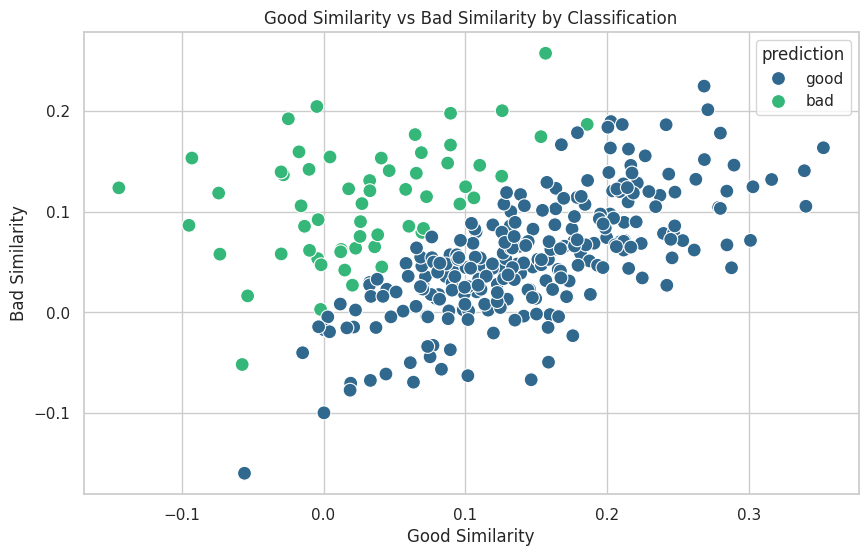

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas Dataframe
df_plot = df.toPandas()

# Set style for the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x="good_sim", y="bad_sim", hue="prediction", palette="viridis", s=100)

# Set plot labels and title
plt.title("Good Similarity vs Bad Similarity by Classification")
plt.xlabel("Good Similarity")
plt.ylabel("Bad Similarity")

# Show the plot
plt.show()

Finally, let us save the results in a file.

In [ ]:
df.write.csv("/content/predictions.csv", header=True)

### Recall the accuracy of the binary classifier

Since some data used was generated randomly, we have label for a big part of the comment's dataframe. We will compute the accuracy as the division between the correct prediction and the total amount of comments labelled.

In [45]:
# Load the data
df1 = spark.read.csv('dfs/binaryClassification.csv', header=True, inferSchema=True,sep=',')
df1 = df1.select(df1.comment.alias("comment1"),"prediction").distinct()
df2 = spark.read.csv('comments_df.csv', header=True, inferSchema=True,sep='=').select("comment","label").distinct()

# Join the data
df = df1.join(df2, df1.comment1 == df2.comment, 'inner').select("comment","label","prediction")
df.show()

+--------------------+-----+----------+
|             comment|label|prediction|
+--------------------+-----+----------+
|The faculty were ...| good|      good|
|The program's int...| good|      good|
|The faculty membe...| good|      good|
|The program's app...| good|      good|
|The program had a...| good|      good|
|Internship opport...|  bad|       bad|
|The capstone proj...| good|      good|
|The program's com...| good|      good|
|I appreciated the...| good|      good|
|Professors are of...|  bad|      good|
|The program offer...| good|      good|
|I felt well-prepa...| good|      good|
|The coursework wa...| good|      good|
|The curriculum wa...| good|      good|
|Advisors are avai...| good|      good|
|The program's fle...| good|      good|
|The program's foc...| good|      good|
|Technology in cla...|  bad|      good|
|The workload was ...| good|       bad|
|Grading is incons...|  bad|       bad|
+--------------------+-----+----------+
only showing top 20 rows



In [46]:
# Get the amount of rows in which label == prediction
filtered_df = df.filter(df.label == df.prediction)

In [49]:
print(f"The accuracy of the model will be {filtered_df.count()/df.count()}")

The accuracy of the model will be 0.8309859154929577


### Topic of the comment

In this section, we want to classify the comments depending on the topic they cover. For example, some comments talk about schedule, teachers or courses. We will use embedding extraction and then K-Means to cluster group with similar reviews.

In [31]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import re

# UDF for basic text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# We will be using the following comments
df = reviews.select("comment").distinct()

clean_text_udf = fn.udf(clean_text, StringType())
df = df.withColumn('cleaned_review', clean_text_udf(fn.col('comment')))

# Define a UDF to convert sentences to embeddings
def embed_sentence(sentence):
    embedding = model.encode(sentence)
    return embedding.tolist()

embed_sentence_udf = fn.udf(embed_sentence, ArrayType(FloatType()))

# Apply the UDF to create a new column with embeddings
df = df.withColumn("embedding", embed_sentence_udf(df["comment"]))

# Expand Embeddings into multiple columns with the different embeddings
num_dimensions = len(df.select("embedding").first()[0])

for i in range(num_dimensions):
    df = df.withColumn(f"embedding_{i+1}", fn.col("embedding")[i])

In [32]:
embedding_columns = [f"embedding_{i+1}" for i in range(num_dimensions)]

# Convert embeddings into a feature vector
assembler = VectorAssembler(inputCols=embedding_columns, outputCol='features')
df = assembler.transform(df)

# Perform K-Means clustering
kmeans = KMeans(k=3, seed=1, featuresCol='features', predictionCol='topic')
model = kmeans.fit(df)
df = model.transform(df)

# Show reviews grouped by topic
collected_df = df.groupBy("topic").agg(fn.collect_list("comment"))
# collected_df.show()

In [33]:
# Tokenize the comments by splitting on whitespace and converting to lowercase
df = df.withColumn('tokenized', fn.split(fn.lower(fn.col('cleaned_review')), ' ')) # In the future we have to use col('cleaned_review') or col('comment')
df = df.withColumn('token',fn.explode(fn.col('tokenized')))

# Filter out common stop words
stop_words = set(["the", "is", "are", "a", "an", "and", "in", "to", "with", "for", "of", "on", "it", "this", "that", "too", "i", "love", "great", "flexible","was","not","am","my","me","but","very","were","though"])
df_filtered = df.filter(~fn.col('token').isin(stop_words))

# Group by topic and token, then count occurrences
word_freq = df_filtered.groupBy('topic', 'token').count().orderBy('topic', 'count', ascending=[True, False])

# Define the number of top words you want to extract
top_n = 1

# Extract top N words for each topic
top_words = word_freq.groupBy('topic').agg(fn.collect_list('token').alias('tokens'), fn.collect_list('count').alias('counts'))
top_words = top_words.withColumn('top_tokens',fn.slice(fn.col('tokens'), 1, top_n))

# Show the top words for each topic
# top_words.select('topic', 'top_tokens').show()

In [34]:
# Turn the array top_token into a string with the topic
top_words = top_words.withColumn("top_token", fn.col("top_tokens").getItem(0))
top_words = top_words.select('topic','top_token')

# Join top_words with the dataframe
df = df.join(top_words, df.topic == top_words.topic, 'left')

In [35]:
from pyspark.ml.feature import PCA


# Reduce dimensionality using PCA
pca = PCA(k=2, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(df)
df = pca_model.transform(df)

# Select PCA features and cluster
pandas_df = df.select("pca_features", df.top_token.alias("topic")).toPandas()
pandas_df[['pca_x', 'pca_y']] = pandas_df['pca_features'].apply(lambda x: pd.Series(x.toArray()))

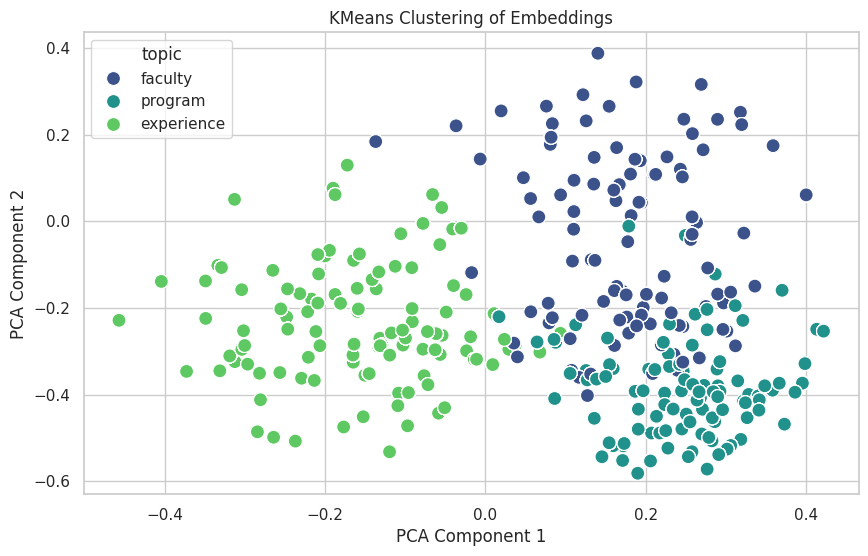

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plot
sns.set(style="whitegrid")

# Create a scatter plot of the PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x="pca_x", y="pca_y", hue="topic", palette="viridis", data=pandas_df, legend="full", s=100)

# Set plot labels and title
plt.title("KMeans Clustering of Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Show the plot
plt.show()

In [ ]:
df.write.csv("/content/clustering.csv",sep=';',header=True)

### Add the ML features in Reviews 

Finally, we can add the new features in the Review's dataframe

In [ ]:
# Load the data
df1 = spark.read.csv('parquet/feedback.csv', header=True, inferSchema=True,sep=';').select("comment","classification").distinct()
df2 = spark.read.csv('parquet/topics.csv', header=True, inferSchema=True,sep=';').select("comment","top_token").distinct()

df1 = df1.withColumnRenamed("comment", "comment_1")
df2 = df2.withColumnRenamed("comment", "comment_2")


# Join the dfs with the review's df
reviews = reviews.join(df1, reviews.comment == df1.comment_1, 'left').join(df2, reviews.comment == df2.comment_2, 'left')
reviews = reviews.select("ID", "program_fk", "date", reviews.comment,reviews.classification.alias("feedback"),\
                         reviews.top_token.alias("topic"))

### Recommendation system on program titles

In [48]:
# Get the dataframe to be used 
df1 = joined_df.select('ID',joined_df.uni_ID.alias('uni_fk'),'Title')
df2 = universities_df.select('uni_ID','University')
df = df1.join(df2, df1.uni_fk == df2.uni_ID,'left').select('ID','Title','uni_ID','University')
df.show()

+---+--------------------+------+--------------------+
| ID|               Title|uni_ID|          University|
+---+--------------------+------+--------------------+
|  1|Degree in Tourism...|    39|Polytechnic Unive...|
|  2|Degree in Busines...|    35|Open University o...|
|  3|Degree in Anthrop...|    20|               (Set)|
|  4|Degree in Arts fr...|    35|Open University o...|
|  5|Degree in Applied...|    35|Open University o...|
|  6|Degree in Politic...|    35|Open University o...|
|  7|Degree in Social ...|    35|Open University o...|
|  8|Degree in Communi...|    35|Open University o...|
|  9|Degree in Crimino...|    35|Open University o...|
| 10|Degree in Law fro...|    35|Open University o...|
| 11|Degree in Digital...|    35|Open University o...|
| 12|Degree in Economi...|    35|Open University o...|
| 13|Degree in Primary...|    35|Open University o...|
| 14|Degree in Social ...|    35|Open University o...|
| 15|Degree in Managem...|    20|               (Set)|
| 16|Degre

In [49]:
# Split Program and University in an array of words
df = df.withColumn("wordsProgram", fn.split(fn.col("Title"), " ")) \
       .withColumn("wordsUni", fn.split(fn.col("University"), " "))

# Keep the words from wordsProgram that not appear in wordsUni
df = df.withColumn("result", fn.array_except("wordsProgram", "wordsUni")) \
       .withColumn("final_program", fn.concat_ws(" ", "result")) \
       .select('ID','Title','final_program')
df.show()


+---+--------------------+--------------------+
| ID|               Title|       final_program|
+---+--------------------+--------------------+
|  1|Degree in Tourism...|Degree in Tourism...|
|  2|Degree in Busines...|Degree in Busines...|
|  3|Degree in Anthrop...|Degree in Anthrop...|
|  4|Degree in Arts fr...|Degree in Arts fr...|
|  5|Degree in Applied...|Degree in Applied...|
|  6|Degree in Politic...|Degree in Politic...|
|  7|Degree in Social ...|Degree in Social ...|
|  8|Degree in Communi...|Degree in Communi...|
|  9|Degree in Crimino...|Degree in Crimino...|
| 10|Degree in Law fro...|Degree in Law fro...|
| 11|Degree in Digital...|Degree in Digital...|
| 12|Degree in Economi...|Degree in Economi...|
| 13|Degree in Primary...|Degree in Primary...|
| 14|Degree in Social ...|Degree in Social ...|
| 15|Degree in Managem...|Degree in Managem...|
| 16|Degree in History...|Degree in History...|
| 17|Degree in Humanit...|Degree in Humanit...|
| 18|Degree in Informa...|Degree in Info

In [50]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nilsvanesostos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

stop_words = set(stopwords.words('english'))

def clean_text(text):
    words = text.lower().split()
    cleaned_words = [word for word in words if word not in stop_words]
    return ' '.join(cleaned_words)

clean_text_udf = fn.udf(clean_text, StringType())
df = df.withColumn("cleaned_title", clean_text_udf(df["final_program"]))
df.show()

+---+--------------------+--------------------+--------------------+
| ID|               Title|       final_program|       cleaned_title|
+---+--------------------+--------------------+--------------------+
|  1|Degree in Tourism...|Degree in Tourism...|      degree tourism|
|  2|Degree in Busines...|Degree in Busines...|degree business a...|
|  3|Degree in Anthrop...|Degree in Anthrop...|degree anthropolo...|
|  4|Degree in Arts fr...|Degree in Arts fr...|         degree arts|
|  5|Degree in Applied...|Degree in Applied...|degree applied da...|
|  6|Degree in Politic...|Degree in Politic...|degree political ...|
|  7|Degree in Social ...|Degree in Social ...|degree social sci...|
|  8|Degree in Communi...|Degree in Communi...|degree communication|
|  9|Degree in Crimino...|Degree in Crimino...|  degree criminology|
| 10|Degree in Law fro...|Degree in Law fro...|          degree law|
| 11|Degree in Digital...|Degree in Digital...|degree digital de...|
| 12|Degree in Economi...|Degree i

In [ ]:
# Collect cleaned titles into a list
titles = df.select("cleaned_title").rdd.flatMap(lambda x: x).collect()

# Use TfidfVectorizer to transform titles into TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(titles)

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim)

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim_df):
    idx = df.select("cleaned_title").rdd.flatMap(lambda x: x).collect().index(title)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Top 5 similar titles
    program_indices = [i[0] for i in sim_scores]
    
    # Collect the titles corresponding to the program indices
    titles = df.select("title").rdd.flatMap(lambda x: x).collect()
    recommended_titles = [titles[i] for i in program_indices]
    
    return recommended_titles

In [ ]:
pandas_df = df.toPandas()
final_df = pd.DataFrame(columns=['Title','Recommedation1','Recommedation2','Recommedation3','Recommedation4','Recommedation5'])

for program_title in pandas_df['cleaned_title']:
    recommendations = get_recommendations(program_title)
    

    new_row = {'Title': program_title, 'Recommedation1': recommendations[0], \
               'Recommedation2': recommendations[1],'Recommedation3': recommendations[2], \
               'Recommedation4': recommendations[3],'Recommendation5':recommendations[5]}
    new_df = pd.DataFrame(new_row, index=[0])
    final_df = pd.concat([final_df, new_df], ignore_index=False)
    
# program_title = "Degree in Economics from the Open University of Catalonia"
# recommendations = get_recommendations(clean_text(program_title))

In [ ]:
final_df.to_csv('dfs/recommendations.csv',sep='=',index=False)

In [229]:
df = spark.read.csv('dfs/recommendations.csv', header=True, inferSchema=True, sep='=')
df = df.select('Cleaned Title','Recommendation1','Recommendation2','Recommendation3','Recommendation4','Recommendation5')

# And create an ID for every row
window_spec = Window.partitionBy(fn.lit(1)).orderBy(fn.monotonically_increasing_id())
df = df.withColumn("program_ID", fn.row_number().over(window_spec))

# Join the original df with this one
df = df.join(programs_df, df.program_ID == programs_df.ID, 'left').select('program_ID','Title','Recommendation1',\
             'Recommendation2','Recommendation3','Recommendation4','Recommendation5')
df.show()

+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|program_ID|               Title|     Recommendation1|     Recommendation2|     Recommendation3|     Recommendation4|     Recommendation5|
+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|         1|Degree in Tourism...|Degree in Tourism...|Degree in Tourism...|Degree in Tourism...|Degree in Tourism...|Degree in Tourism...|
|         2|Degree in Busines...|Degree in Busines...|Degree in Busines...|Degree in Busines...|Degree in Busines...|Degree in Busines...|
|         3|Degree in Anthrop...|Master's Degree i...|Master's Degree i...|Degree in Tourism...|Degree in Tourism...|Master's Degree i...|
|         4|Degree in Arts fr...|Degree in Arts an...|Master's Degree i...|Master's Degree i...|Degree in Visual ...|Degree in Fine Ar...|
|         5|Degree in Appli

In [230]:
# Combine an array with all the recommendations 
df = df.withColumn("Recommendations", fn.array("Recommendation1", "Recommendation2", "Recommendation3", "Recommendation4", "Recommendation5"))

# Drop the columns we will no longer use
df = df.drop('Recommendation1','Recommendation2','Recommendation3','Recommendation4','Recommendation5')

# Check if there there is a recommendation that is the actuall element
df = df.withColumn("final_rec", fn.expr("filter(Recommendations, x -> x != Title)")) \
       .drop('Recommendations')

df.show()

+----------+--------------------+--------------------+
|program_ID|               Title|           final_rec|
+----------+--------------------+--------------------+
|         1|Degree in Tourism...|[Degree in Touris...|
|         2|Degree in Busines...|[Degree in Busine...|
|         3|Degree in Anthrop...|[Master's Degree ...|
|         4|Degree in Arts fr...|[Degree in Arts a...|
|         5|Degree in Applied...|[Degree in Applie...|
|         6|Degree in Politic...|[Degree in Politi...|
|         7|Degree in Social ...|[University Maste...|
|         8|Degree in Communi...|[Degree in Commun...|
|         9|Degree in Crimino...|[Degree in Crimin...|
|        10|Degree in Law fro...|[Degree in Law fr...|
|        11|Degree in Digital...|[Master's Degree ...|
|        12|Degree in Economi...|[Degree in Econom...|
|        13|Degree in Primary...|[Degree in Primar...|
|        14|Degree in Social ...|[Degree in Social...|
|        15|Degree in Managem...|[Degree in Touris...|
|        1

In [231]:
programs_df.show()

+--------------------+--------+--------------------+--------------------+--------------------+--------+--------+--------------------+------------+-------------+----------+----------+--------------+---+------------+------------+
|               Title|    Type|          University|         Description|                 URL|Duration|Location|     ApplicationDate|StartingDate|EligibleScore|EnglishLvl|SpanishLvl|BachelorNeeded| ID|orderEnglish|orderSpanish|
+--------------------+--------+--------------------+--------------------+--------------------+--------+--------+--------------------+------------+-------------+----------+----------+--------------+---+------------+------------+
|Degree in Tourism...|Bachelor|Polytechnic Unive...|Degree in Tourism...|https://polytechn...|       4|   Spain|31/05/2025-31/07/...|      Sep-25|            7|        A2|        B2|         false|  1|           2|           4|
|Degree in Busines...|Bachelor|Open University o...|Degree in Busines...|https://openuni

In [232]:
# Put every recommedation in different columns
df = df.select(
    "program_ID",
    df["final_rec"].getItem(0).alias("Recommendation1"),
    df["final_rec"].getItem(1).alias("Recommendation2"),
    df["final_rec"].getItem(2).alias("Recommendation3"),
    df["final_rec"].getItem(3).alias("Recommendation4")
)

# Join with programs_df and add the ID for every recommendation
df = df.join(programs_df, df.Recommendation1 == programs_df.Title, 'inner')
df = df.select('program_ID',df.ID.alias('rec1_ID'),'Recommendation1','Recommendation2','Recommendation3',\
       'Recommendation4')

df = df.join(programs_df, df.Recommendation2 == programs_df.Title, 'left')
df = df.select('program_ID','rec1_ID','Recommendation1',df.ID.alias('rec2_ID'),'Recommendation2','Recommendation3',\
       'Recommendation4')
df.show()

df = df.join(programs_df, df.Recommendation3 == programs_df.Title, 'left')
df = df.select('program_ID','rec1_ID','Recommendation1','rec2_ID','Recommendation2',df.ID.alias('rec3_ID'),'Recommendation3',\
       'Recommendation4')

df = df.join(programs_df, df.Recommendation4 == programs_df.Title, 'left')
df = df.select('program_ID','rec1_ID','Recommendation1','rec2_ID','Recommendation2','rec3_ID','Recommendation3',\
       df.ID.alias('rec4_ID'),'Recommendation4')

+----------+-------+--------------------+-------+--------------------+--------------------+--------------------+
|program_ID|rec1_ID|     Recommendation1|rec2_ID|     Recommendation2|     Recommendation3|     Recommendation4|
+----------+-------+--------------------+-------+--------------------+--------------------+--------------------+
|         1|    119|Degree in Tourism...|   1504|Degree in Tourism...|Degree in Tourism...|Degree in Tourism...|
|         1|    119|Degree in Tourism...|   1456|Degree in Tourism...|Degree in Tourism...|Degree in Tourism...|
|         1|     34|Degree in Tourism...|   1504|Degree in Tourism...|Degree in Tourism...|Degree in Tourism...|
|         1|     34|Degree in Tourism...|   1456|Degree in Tourism...|Degree in Tourism...|Degree in Tourism...|
|         2|    597|Degree in Busines...|    690|Degree in Busines...|Degree in Busines...|Degree in Busines...|
|         3|     85|Master's Degree i...|    108|Master's Degree i...|Degree in Tourism...|Degre

In [233]:
df = df.dropDuplicates(["program_ID"])

df.show()

+----------+-------+--------------------+-------+--------------------+-------+--------------------+-------+--------------------+
|program_ID|rec1_ID|     Recommendation1|rec2_ID|     Recommendation2|rec3_ID|     Recommendation3|rec4_ID|     Recommendation4|
+----------+-------+--------------------+-------+--------------------+-------+--------------------+-------+--------------------+
|         1|    119|Degree in Tourism...|   1504|Degree in Tourism...|   1855|Degree in Tourism...|   2059|Degree in Tourism...|
|         2|    597|Degree in Busines...|    690|Degree in Busines...|    825|Degree in Busines...|   1021|Degree in Busines...|
|         3|     85|Master's Degree i...|    108|Master's Degree i...|  10692|Degree in Tourism...|    119|Degree in Tourism...|
|         4|   9806|Degree in Arts an...|    878|Master's Degree i...|    945|Master's Degree i...|   1971|Degree in Visual ...|
|         5|   8585|Degree in Applied...|    599|Degree in Data Sc...|   2251|Degree in Data Sc..

In [234]:
# We can drop the recommendations titles
df = df.drop('Recommendation1','Recommendation2','Recommendation3','Recommendation4')

# Join with the program_df to get the final version of the dataframe
ref_df = programs_df.join(df, programs_df.ID == df.program_ID,'left')
ref_df = ref_df.drop('program_ID')

In [235]:
ref_df = ref_df.orderBy("ID")
ref_df.show()

+--------------------+--------+--------------------+--------------------+--------------------+--------+--------+--------------------+------------+-------------+----------+----------+--------------+---+------------+------------+-------+-------+-------+-------+
|               Title|    Type|          University|         Description|                 URL|Duration|Location|     ApplicationDate|StartingDate|EligibleScore|EnglishLvl|SpanishLvl|BachelorNeeded| ID|orderEnglish|orderSpanish|rec1_ID|rec2_ID|rec3_ID|rec4_ID|
+--------------------+--------+--------------------+--------------------+--------------------+--------+--------+--------------------+------------+-------------+----------+----------+--------------+---+------------+------------+-------+-------+-------+-------+
|Degree in Tourism...|Bachelor|Polytechnic Unive...|Degree in Tourism...|https://polytechn...|       4|   Spain|31/05/2025-31/07/...|      Sep-25|            7|        A2|        B2|         false|  1|           2|      

## Define the dataframes

Now, we will prepare the datasets for its insertion in the graph.

### From_df

In [236]:
# Define the dataframe with the relation between programs and universities
from_df = joined_df.select("ID","uni_ID")
from_df = joined_df.select(joined_df.ID.alias("START_ID"),joined_df.uni_ID.alias("END_ID"))

### Programs_df

In [237]:
# Define the dataframe with the semantics of programs
programs_df = programs_df.select(programs_df.ID.alias("program_ID"),programs_df.Title,\
              programs_df.Type,programs_df.Description,programs_df.URL,programs_df.Duration,\
              programs_df.ApplicationDate,programs_df.StartingDate,programs_df.EligibleScore,\
              programs_df.EnglishLvl,programs_df.SpanishLvl,programs_df.BachelorNeeded)

### Recommended_df

In [238]:
# Define the dataframe with the recommendations for each program
recomendations1_df = ref_df.select(ref_df.ID.alias("START_ID"),ref_df.rec1_ID.alias("END_ID"))
recomendations2_df = ref_df.select(ref_df.ID.alias("START_ID"),ref_df.rec2_ID.alias("END_ID"))
recomendations3_df = ref_df.select(ref_df.ID.alias("START_ID"),ref_df.rec3_ID.alias("END_ID"))
recomendations4_df = ref_df.select(ref_df.ID.alias("START_ID"),ref_df.rec4_ID.alias("END_ID"))
# The recommended_df will be the union of all this dataframes
recommended_df = recomendations1_df.union(recomendations2_df).union(recomendations3_df).union(recomendations4_df)

### Universities_df

In [239]:
# Define the dataframe with the semantics of universities
universities_df = universities_df.select(universities_df.uni_ID.alias("ID"),universities_df.University.alias("Name"),\
                  universities_df.Location)

### Scholarships_df

In [240]:
scholarships_df = scholarships_df.select("ID","AwardName","Deadline","EligibleScore","EnglishLvl",\
            "BachelorNeeded","SpanishLvl", "Nationality","Amount","NumAwards","MinAge","MaxAge",\
            "AcademicPerformance")

### Eligible_for_df

In [241]:
# Define the dataframe with the relation between scholarships and programs
eligible_for_df = sch_pr.select(sch_pr.ID.alias("START_ID"),sch_pr.program_fk.alias("END_ID"))

### Reviews_df

This dataframe will consist on the different comments of the database.

In [197]:
reviews_df = spark.read.csv('dfs/reviews.csv', header=True, inferSchema=True, sep='=')
# reviews_df = reviews.select(reviews.ID.alias("review_ID"),"date","comment","feedback","topic").distinct()

### Opinions_df

This dataframe will contain the relationship between reviews_df and programs_df.

In [198]:
opinions_df = spark.read.csv('dfs/opinions.csv', header=True, inferSchema=True, sep='=')
# opinions_df = reviews.select(reviews.ID.alias("START_ID"),reviews.program_fk.alias("END_ID"))

### Users_df

This df encodes the information regarding users.

In [199]:
users_df = users.select(users.ID.alias("user_ID"),"name","email","register_date").distinct()

### Writes

This df will contain the relationship between Users and Reviews.

In [200]:
writes_df = users.select(users.ID.alias("START_ID"),users.comment_fk.alias("END_ID"))

### Save the dataframes

First we convert the Spark Dataframes into Pandas Dataframes.

In [31]:
# programs_df = programs_df.toPandas()
# universities_df = universities_df.toPandas()
# from_df = from_df.toPandas()
# scholarships_df = scholarships_df.toPandas()
# eligible_for_df = eligible_for_df.toPandas()
# reviews_df = reviews_df.toPandas()
# opinions_df = opinions_df.toPandas()
# users_df = users_df.toPandas()
# writes_df = writes_df.toPandas()
# recommended_df = recommended_df.toPandas()

programs_df = pd.read_csv('dfs/programs.csv',sep='=')
universities_df = pd.read_csv('dfs/universities.csv',sep='=')
from_df = pd.read_csv('dfs/from.csv',sep='=')
scholarships_df = pd.read_csv('dfs/scholarships.csv',sep='=')
eligible_for_df = pd.read_csv('dfs/eligible_for.csv',sep='=')
reviews_df = pd.read_csv('dfs/reviews.csv',sep='=')
opinions_df = pd.read_csv('dfs/opinions.csv',sep='=')
users_df = pd.read_csv('dfs/users.csv',sep='=')
writes_df = pd.read_csv('dfs/writes.csv',sep='=')
recommended_df = pd.read_csv('dfs/recommends.csv',sep='=')

Then, we save the dataframes in files.

In [263]:
programs_df.to_csv('dfs/programs.csv',sep='=',index=False)
universities_df.to_csv('dfs/universities.csv',sep='=',index=False)
from_df.to_csv('dfs/from.csv',sep='=',index=False)
scholarships_df.to_csv('dfs/scholarships.csv',sep='=',index=False)
eligible_for_df.to_csv('dfs/eligible_for.csv',sep='=',index=False)
reviews_df.to_csv('dfs/reviews.csv',sep='=',index=False)
opinions_df.to_csv('dfs/opinions.csv',sep='=',index=False)
users_df.to_csv('dfs/users.csv',sep='=',index=False)
writes_df.to_csv('dfs/writes.csv',sep='=',index=False)
recommended_df.to_csv('dfs/recommends.csv',sep='=',index=False)

Exception in thread "serve-DataFrame" java.net.SocketTimeoutException: Accept timed out
	at java.net.PlainSocketImpl.socketAccept(Native Method)
	at java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:409)
	at java.net.ServerSocket.implAccept(ServerSocket.java:560)
	at java.net.ServerSocket.accept(ServerSocket.java:528)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:65)


# Creation of the KG

## TBOX Definition

In [33]:
from rdflib import Graph, Namespace, Literal
from rdflib.namespace import RDFS, RDF, XSD
import pandas as pd

Define the namespace,

In [34]:
BDM = Namespace('http://www.example.edu/')

In this section, we want to define the TBOX, that is, the conceptual level of entities and their inter-relationships.

In [35]:
g = Graph()
g.bind("BDM", BDM)

### Classes

In [36]:
g.add((BDM.program,RDF.type,RDFS.Class))
g.add((BDM.university,RDF.type,RDFS.Class))
g.add((BDM.scholarship,RDF.type,RDFS.Class))
g.add((BDM.review,RDF.type,RDFS.Class))
g.add((BDM.user,RDF.type,RDFS.Class))

<Graph identifier=N53f55423170a4ed3aea6e7472aa83ad0 (<class 'rdflib.graph.Graph'>)>

### Subclasses

In [37]:
g.add((BDM.bachelor,RDFS.subClassOf,BDM.program))
g.add((BDM.master,RDFS.subClassOf,BDM.program))

<Graph identifier=N53f55423170a4ed3aea6e7472aa83ad0 (<class 'rdflib.graph.Graph'>)>

### Properties

In [38]:
# For the properties of program:
g.add((BDM.program_ID,RDF.type,RDF.Property))
g.add((BDM.program_ID,RDFS.domain,BDM.program))

g.add((BDM.title,RDF.type,RDF.Property))
g.add((BDM.title,RDFS.domain,BDM.program))

g.add((BDM.desciption,RDF.type,RDF.Property))
g.add((BDM.description,RDFS.domain,BDM.program))

g.add((BDM.url,RDF.type,RDF.Property))
g.add((BDM.url,RDFS.domain,BDM.program))

g.add((BDM.duration,RDF.type,RDF.Property))
g.add((BDM.duration,RDFS.domain,BDM.program))

g.add((BDM.ap_date,RDF.type,RDF.Property))
g.add((BDM.ap_date,RDFS.domain,BDM.program))

g.add((BDM.st_date,RDF.type,RDF.Property))
g.add((BDM.st_date,RDFS.domain,BDM.program))

g.add((BDM.score,RDF.type,RDF.Property))
g.add((BDM.score,RDFS.domain,BDM.program))

g.add((BDM.eng_lvl,RDF.type,RDF.Property))
g.add((BDM.eng_lvl,RDFS.domain,BDM.program))

g.add((BDM.spa_lvl,RDF.type,RDF.Property))
g.add((BDM.spa_lvl,RDFS.domain,BDM.program))

g.add((BDM.bachelor_needed,RDF.type,RDF.Property))
g.add((BDM.bachelor_needed,RDFS.domain,BDM.program))

# For the properties of university:
g.add((BDM.uni_ID,RDF.type,RDF.Property))
g.add((BDM.uni_ID,RDFS.domain,BDM.university))

g.add((BDM.name,RDF.type,RDF.Property))
g.add((BDM.name,RDFS.domain,BDM.university))

g.add((BDM.location,RDF.type,RDF.Property))
g.add((BDM.location,RDFS.domain,BDM.university))

# For the properties of scholarship:
g.add((BDM.sch_ID,RDF.type,RDF.Property))
g.add((BDM.sch_ID,RDFS.domain,BDM.scholarship))

g.add((BDM.award_name,RDF.type,RDF.Property))
g.add((BDM.award_name,RDFS.domain,BDM.scholarship))

g.add((BDM.deadline,RDF.type,RDF.Property))
g.add((BDM.deadline,RDFS.domain,BDM.scholarship))

g.add((BDM.score,RDF.type,RDF.Property))
g.add((BDM.score,RDFS.domain,BDM.scholarship))

g.add((BDM.eng_lvl,RDF.type,RDF.Property))
g.add((BDM.eng_lvl,RDFS.domain,BDM.scholarship))

g.add((BDM.spa_lvl,RDF.type,RDF.Property))
g.add((BDM.spa_lvl,RDFS.domain,BDM.scholarship))

g.add((BDM.bachelor_needed,RDF.type,RDF.Property))
g.add((BDM.bachelor_needed,RDFS.domain,BDM.scholarship))

g.add((BDM.nationality,RDF.type,RDF.Property))
g.add((BDM.nationality,RDFS.domain,BDM.scholarship))

g.add((BDM.amount,RDF.type,RDF.Property))
g.add((BDM.amount,RDFS.domain,BDM.scholarship))

g.add((BDM.num_awards,RDF.type,RDF.Property))
g.add((BDM.num_awards,RDFS.domain,BDM.scholarship))

g.add((BDM.min_age,RDF.type,RDF.Property))
g.add((BDM.min_age,RDFS.domain,BDM.scholarship))

g.add((BDM.max_age,RDF.type,RDF.Property))
g.add((BDM.max_age,RDFS.domain,BDM.scholarship))

g.add((BDM.academic_perf,RDF.type,RDF.Property))
g.add((BDM.academic_perf,RDFS.domain,BDM.scholarship))

# For the properties of user:
g.add((BDM.user_ID,RDF.type,RDF.Property))
g.add((BDM.user_ID,RDFS.domain,BDM.user))

g.add((BDM.name,RDF.type,RDF.Property))
g.add((BDM.name,RDFS.domain,BDM.user))

g.add((BDM.email,RDF.type,RDF.Property))
g.add((BDM.email,RDFS.domain,BDM.user))

g.add((BDM.register_date,RDF.type,RDF.Property))
g.add((BDM.register_date,RDFS.domain,BDM.user))

# For the properties of review:
g.add((BDM.review_ID,RDF.type,RDF.Property))
g.add((BDM.review_ID,RDFS.domain,BDM.review))

g.add((BDM.date,RDF.type,RDF.Property))
g.add((BDM.date,RDFS.domain,BDM.review))

g.add((BDM.comment,RDF.type,RDF.Property))
g.add((BDM.comment,RDFS.domain,BDM.review))

g.add((BDM.feedback,RDF.type,RDF.Property))
g.add((BDM.feedback,RDFS.domain,BDM.review))

g.add((BDM.topic,RDF.type,RDF.Property))
g.add((BDM.topic,RDFS.domain,BDM.review))

<Graph identifier=N53f55423170a4ed3aea6e7472aa83ad0 (<class 'rdflib.graph.Graph'>)>

### Relationships

In [39]:
# For the relationship between Program and University:
g.add((BDM.from_uni,RDF.type,RDF.Property))
g.add((BDM.from_uni,RDFS.domain,BDM.program))
g.add((BDM.from_uni,RDFS.range,BDM.university))
g.add((BDM.program,BDM.from_uni,BDM.university))

# For the relationship between Scholarship and University
g.add((BDM.eligible_for,RDF.type,RDF.Property))
g.add((BDM.eligible_for,RDFS.domain,BDM.scholarship))
g.add((BDM.eligible_for,RDFS.range,BDM.program))
g.add((BDM.scholarship,BDM.eligible_for,BDM.program))

# For the relationship between Review and Program
g.add((BDM.opinion_of,RDF.type,RDF.Property))
g.add((BDM.opinion_of,RDFS.domain,BDM.review))
g.add((BDM.opinion_of,RDFS.range,BDM.program))
g.add((BDM.review,BDM.opinion_of,BDM.program))

# For the relationship between User and Review
g.add((BDM.writes,RDF.type,RDF.Property))
g.add((BDM.writes,RDFS.domain,BDM.user))
g.add((BDM.writes,RDFS.range,BDM.review))
g.add((BDM.user,BDM.writes,BDM.review))

# For the relationship between Program and Program
g.add((BDM.recommends,RDF.type,RDF.Property))
g.add((BDM.recommends,RDFS.domain,BDM.program))
g.add((BDM.recommends,RDFS.range,BDM.program))
g.add((BDM.program,BDM.recommends,BDM.program))

<Graph identifier=N53f55423170a4ed3aea6e7472aa83ad0 (<class 'rdflib.graph.Graph'>)>

### Serialize

In [40]:
g.serialize('tbox.ttl',format='turtle')

<Graph identifier=N53f55423170a4ed3aea6e7472aa83ad0 (<class 'rdflib.graph.Graph'>)>

## ABOX Definition

### Pogram (Bachelor and Master)

In [41]:
for index,row in programs_df.iterrows():
    if row['Type'] == 'Bachelor':
        # Connect with the element
        g.add((BDM.program+"/"+str(row['program_ID']),RDF.type,BDM.bachelor))
    else:
        # Connect with the element
        g.add((BDM.program+"/"+str(row['program_ID']),RDF.type,BDM.master))

    # Load all the properties
    g.add((BDM.program+"/"+str(row['program_ID']),BDM.program_ID, Literal(str(row['program_ID']), datatype=XSD.string)))
    g.add((BDM.program+"/"+str(row['program_ID']),BDM.title, Literal(row['Title'], datatype=XSD.string)))
    g.add((BDM.program+"/"+str(row['program_ID']),BDM.description, Literal(row['Description'], datatype=XSD.string)))
    g.add((BDM.program+"/"+str(row['program_ID']),BDM.url, Literal(row['URL'], datatype=XSD.string)))
    g.add((BDM.program+"/"+str(row['program_ID']),BDM.duration, Literal(row['Duration'], datatype=XSD.int)))
    g.add((BDM.program+"/"+str(row['program_ID']),BDM.ap_date, Literal(row['ApplicationDate'], datatype=XSD.string)))
    g.add((BDM.program+"/"+str(row['program_ID']),BDM.st_date, Literal(row['StartingDate'], datatype=XSD.string)))
    g.add((BDM.program+"/"+str(row['program_ID']),BDM.score, Literal(row['EligibleScore'], datatype=XSD.int)))
    g.add((BDM.program+"/"+str(row['program_ID']),BDM.eng_lvl, Literal(row['EnglishLvl'], datatype=XSD.string)))
    g.add((BDM.program+"/"+str(row['program_ID']),BDM.spa_lvl, Literal(row['SpanishLvl'], datatype=XSD.string)))
    g.add((BDM.program+"/"+str(row['program_ID']),BDM.bachelor_needed, Literal(row['BachelorNeeded'], datatype=XSD.string)))

### Recommends

In [42]:
for index,row in recommended_df.iterrows():
    g.add((BDM.program+"/"+str(row['START_ID']),BDM.recommends,BDM.program+"/"+str(row['END_ID'])))

### University

In [43]:
for index,row in universities_df.iterrows():
    # Connect with the element
    g.add((BDM.university+"/"+str(row['ID']),RDF.type,BDM.university))
    # Load all the properties
    g.add((BDM.university+"/"+str(row['ID']),BDM.uni_ID, Literal(str(row['ID']), datatype=XSD.string)))
    g.add((BDM.university+"/"+str(row['ID']),BDM.name, Literal(row['Name'], datatype=XSD.string)))
    g.add((BDM.university+"/"+str(row['ID']),BDM.location, Literal(row['Location'], datatype=XSD.string)))

### From

In [44]:
for index,row in from_df.iterrows():
    g.add((BDM.program+"/"+str(row['START_ID']),BDM.from_uni,BDM.university+"/"+str(row['END_ID'])))

### Scholarship

In [45]:
for index,row in scholarships_df.iterrows():
    # Connect with the element
    g.add((BDM.scholarship+"/"+str(row['ID']),RDF.type,BDM.scholarship))
    # Load all the properties
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.sch_ID, Literal(str(row['ID']), datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.award_name, Literal(row['AwardName'], datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.deadline, Literal(row['Deadline'], datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.deadline, Literal(row['Deadline'], datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.score, Literal(row['EligibleScore'], datatype=XSD.int)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.eng_lvl, Literal(row['EnglishLvl'], datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.bachelor_needed, Literal(row['BachelorNeeded'], datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.spa_lvl, Literal(row['SpanishLvl'], datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.nationality, Literal(row['Nationality'], datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.amount, Literal(row['Amount'], datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.num_awards, Literal(row['NumAwards'], datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.min_age, Literal(row['MinAge'], datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.max_age, Literal(row['MaxAge'], datatype=XSD.string)))
    g.add((BDM.scholarship+"/"+str(row['ID']),BDM.acedemic_perf, Literal(row['AcademicPerformance'], datatype=XSD.string)))

### Eligible_for

In [46]:
for index,row in eligible_for_df.iterrows():
    g.add((BDM.scholarship+"/"+str(row['START_ID']),BDM.eligible_for,BDM.program+"/"+str(row['END_ID'])))

### User

In [47]:
for index,row in users_df.iterrows():
    # Connect with the element
    g.add((BDM.user+"/"+str(row['user_ID']),RDF.type,BDM.user))
    # Load all the properties
    g.add((BDM.user+"/"+str(row['user_ID']),BDM.user_ID, Literal(str(row['user_ID']), datatype=XSD.string)))
    g.add((BDM.user+"/"+str(row['user_ID']),BDM.name, Literal(row['name'], datatype=XSD.string)))
    g.add((BDM.user+"/"+str(row['user_ID']),BDM.email, Literal(row['email'], datatype=XSD.string)))
    g.add((BDM.user+"/"+str(row['user_ID']),BDM.register_date, Literal(row['register_date'], datatype=XSD.date)))

### Review

In [48]:
for index,row in reviews_df.iterrows():
    # Connect with the element
    g.add((BDM.review+"/"+str(row['review_ID']),RDF.type,BDM.review))
    # Load all the properties
    g.add((BDM.review+"/"+str(row['review_ID']),BDM.review_ID, Literal(str(row['review_ID']), datatype=XSD.string)))
    g.add((BDM.review+"/"+str(row['review_ID']),BDM.date, Literal(row['date'], datatype=XSD.date)))
    g.add((BDM.review+"/"+str(row['review_ID']),BDM.comment, Literal(row['comment'], datatype=XSD.string)))
    g.add((BDM.review+"/"+str(row['review_ID']),BDM.feedback, Literal(row['classification'], datatype=XSD.string)))
    g.add((BDM.review+"/"+str(row['review_ID']),BDM.topic, Literal(row['top_token'], datatype=XSD.string)))

### Opinion_of

In [49]:
for index,row in opinions_df.iterrows():
    g.add((BDM.review+"/"+str(row['START_ID']),BDM.opinion_of,BDM.program+"/"+str(row['END_ID'])))

### Writes

In [50]:
for index,row in writes_df.iterrows():
    g.add((BDM.user+"/"+str(row['START_ID']),BDM.writes,BDM.review+"/"+str(row['END_ID'])))

### Serialize

In [51]:
g.serialize('abox.ttl',format='turtle')

<Graph identifier=N53f55423170a4ed3aea6e7472aa83ad0 (<class 'rdflib.graph.Graph'>)>

# Load the data in GraphDB

We can load the graph and we will get something like this:

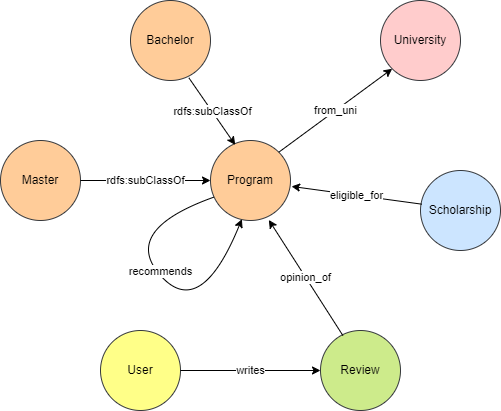